# **Churn Prediction  for a Telecom Company**

**Overview:**

This project aims to develop an advanced churn prediction system for a telecom company by integrating customer segmentation and a prescriptive analytics layer. The primary objective is to predict which customers are likely to churn (leave the service) and recommend targeted retention strategies based on predictive models and customer behavior analysis.

 __Table of Contents__

 <ol>
    <li>
        <a href="#Libraries">Importing Required Libraries</a>
    </li>
    <li>
        <a href="#Data Exploration">Data Exploration</a>
        <ol>
            <li><a href="#Verification">Checking Null and Duplicates Values</a></li>
            <li><a href="#Data Visualisation">Data Visualisation</a></li>
        </ol>
    </li>
    <li>
        <a href="#Data Preprocessing">Data Preprocessing</a>
        <ol>
            <li><a href="###Label Encoding">Label Encoding</a></li>
            <li><a href="###Scaling">Scaling</a></li>
            <li><a href="###KMeans">KMeans</a></li>
            <li><a href="###PCA">PCA</a></li>
            <li><a href="###Data Augmentation">Data Augmentation</a></li>
        </ol>
    </li>
    <li>
        <a href="#Models">Models</a>
        <ol>
            <li><a href="###Split Our Dataset">Split Our Dataset</a></li>
            <li><a href="###XGBoost">XGBoost</a></li>
            <li><a href="###Random Forest">Random Forest</a></li>
            <li><a href="###Decision Tree">Decision Tree</a></li>
        </ol>
    </li>
</ol>

# Libraries

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
#from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score,accuracy_score
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [71]:
telecom_df = pd.read_csv('telecom_dataset/telecom.csv')

In [72]:
telecom_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Verification

* Check For Null Values
* Check For Duplicates Values

In [73]:
telecom_df.isna().sum().sum()

0

In [74]:
telecom_df[telecom_df.duplicated()].shape

(0, 21)

# Data Visualisation

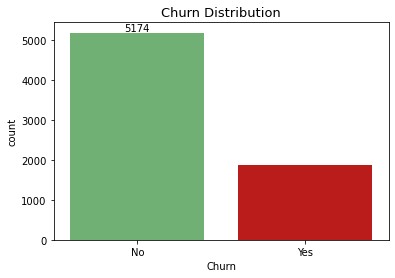

In [75]:
palette = ['#66BB6A', '#D50000']
ax = sns.countplot(data=telecom_df, x="Churn",hue="Churn",palette=palette)
ax.bar_label(ax.containers[0])
plt.title("Churn Distribution", fontsize=13)
plt.show()

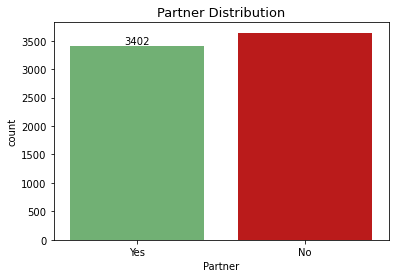

In [76]:
palette = ['#66BB6A', '#D50000']
ax = sns.countplot(data=telecom_df, x="Partner",hue="Partner",palette=palette)
ax.bar_label(ax.containers[0])
plt.title("Partner Distribution", fontsize=13)
plt.show()

In [77]:
gender_count = pd.Series(telecom_df['gender']).value_counts()
internet_services_count = pd.Series(telecom_df['InternetService']).value_counts()

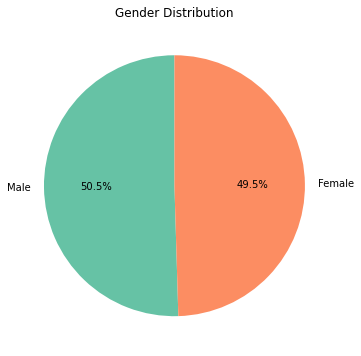

In [78]:
plt.figure(figsize=(6, 6))
plt.pie(gender_count,labels=gender_count.index,autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2", len(gender_count)))
plt.title('Gender Distribution')
plt.show()

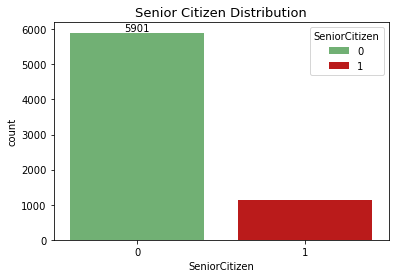

In [79]:
palette = ['#66BB6A', '#D50000']
ax = sns.countplot(data=telecom_df, x="SeniorCitizen",hue="SeniorCitizen",palette=palette)
ax.bar_label(ax.containers[0])
plt.title("Senior Citizen Distribution", fontsize=13)
plt.show()

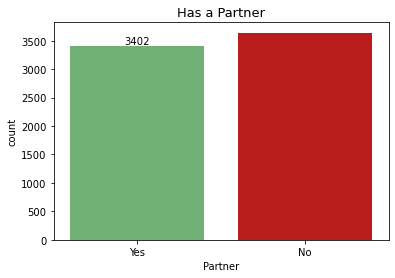

In [80]:
palette = ['#66BB6A', '#D50000']
ax = sns.countplot(data=telecom_df, x="Partner",hue="Partner",palette=palette)
ax.bar_label(ax.containers[0])
plt.title("Has a Partner", fontsize=13)
plt.show()

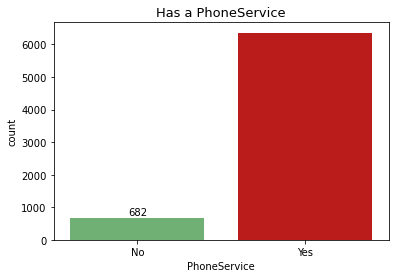

In [24]:
palette = ['#D50000','#66BB6A']
ax = sns.countplot(data=telecom_df, x="PhoneService",hue="PhoneService",palette=palette)
ax.bar_label(ax.containers[0])
plt.title("Has a PhoneService", fontsize=13)
plt.show()

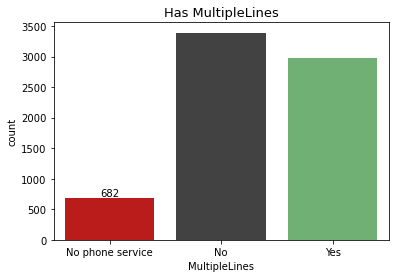

In [27]:
palette = ['#D50000','#424242','#66BB6A',]
ax = sns.countplot(data=telecom_df, x="MultipleLines",hue="MultipleLines",palette=palette)
ax.bar_label(ax.containers[0])
plt.title("Has MultipleLines", fontsize=13)
plt.show()

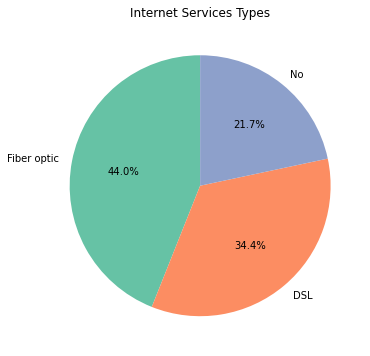

In [31]:
plt.figure(figsize=(6, 6))
plt.pie(internet_services_count,labels=internet_services_count.index,autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2", len(internet_services_count)))
plt.title('Internet Services Types')
plt.show()

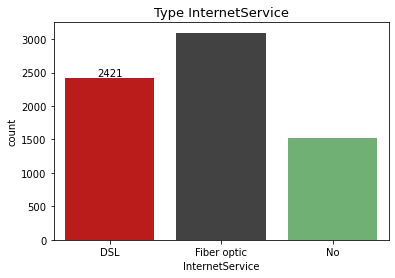

In [29]:

palette = ['#D50000','#424242','#66BB6A',]
ax = sns.countplot(data=telecom_df, x="InternetService",hue="InternetService",palette=palette)
ax.bar_label(ax.containers[0])
plt.title("Type InternetService", fontsize=13)
plt.show()

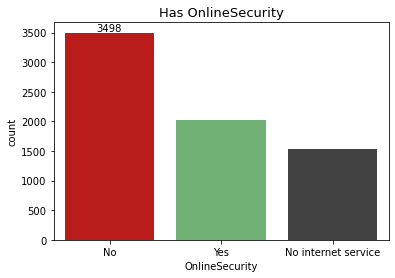

In [35]:
palette = ['#D50000','#66BB6A','#424242']
ax = sns.countplot(data=telecom_df, x="OnlineSecurity",hue="OnlineSecurity",palette=palette)
ax.bar_label(ax.containers[0])
plt.title("Has OnlineSecurity", fontsize=13)
plt.show()

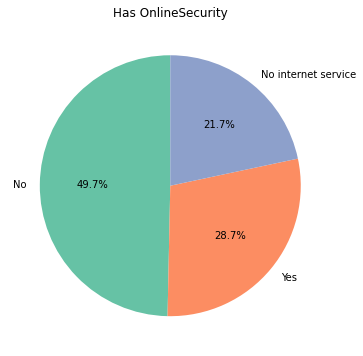

In [36]:
onlinesecurity_count = pd.Series(telecom_df['OnlineSecurity']).value_counts()

plt.figure(figsize=(6, 6))
plt.pie(onlinesecurity_count,labels=onlinesecurity_count.index,autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2", len(onlinesecurity_count)))
plt.title('Has OnlineSecurity')
plt.show()

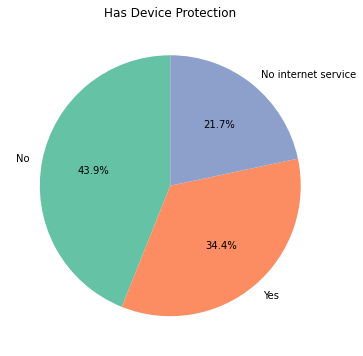

In [39]:
deviceprotection_count = pd.Series(telecom_df['DeviceProtection']).value_counts()

plt.figure(figsize=(6, 6))
plt.pie(deviceprotection_count,labels=deviceprotection_count.index,autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2", len(deviceprotection_count)))
plt.title('Has Device Protection')
plt.show()

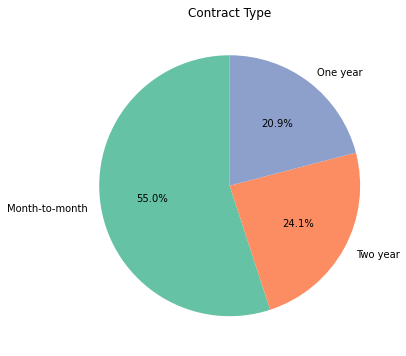

In [43]:
contract_count = pd.Series(telecom_df['Contract']).value_counts()

plt.figure(figsize=(6, 6))
plt.pie(contract_count,labels=contract_count.index,autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2", len(contract_count)))
plt.title('Contract Type')
plt.show()

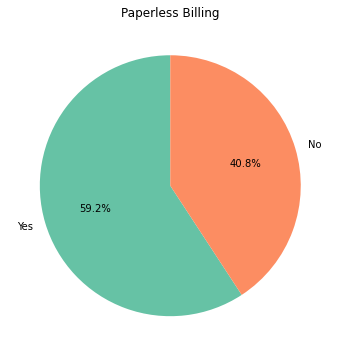

In [45]:
tbilling_count = pd.Series(telecom_df['PaperlessBilling']).value_counts()

plt.figure(figsize=(6, 6))
plt.pie(tbilling_count,labels=tbilling_count.index,autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2", len(tbilling_count)))
plt.title('Paperless Billing')
plt.show()

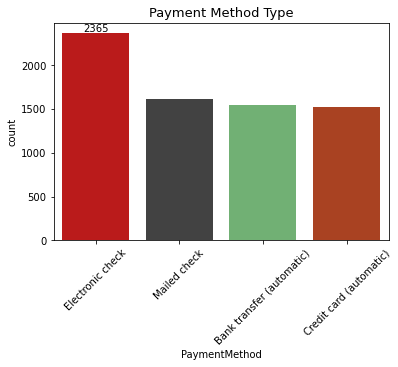

In [81]:
palette = ['#D50000','#424242','#66BB6A','#BF360C']
ax = sns.countplot(data=telecom_df, x="PaymentMethod",hue="PaymentMethod",palette=palette)
ax.bar_label(ax.containers[0])
plt.title("Payment Method Type", fontsize=13)
plt.xticks(rotation=45)
plt.show()

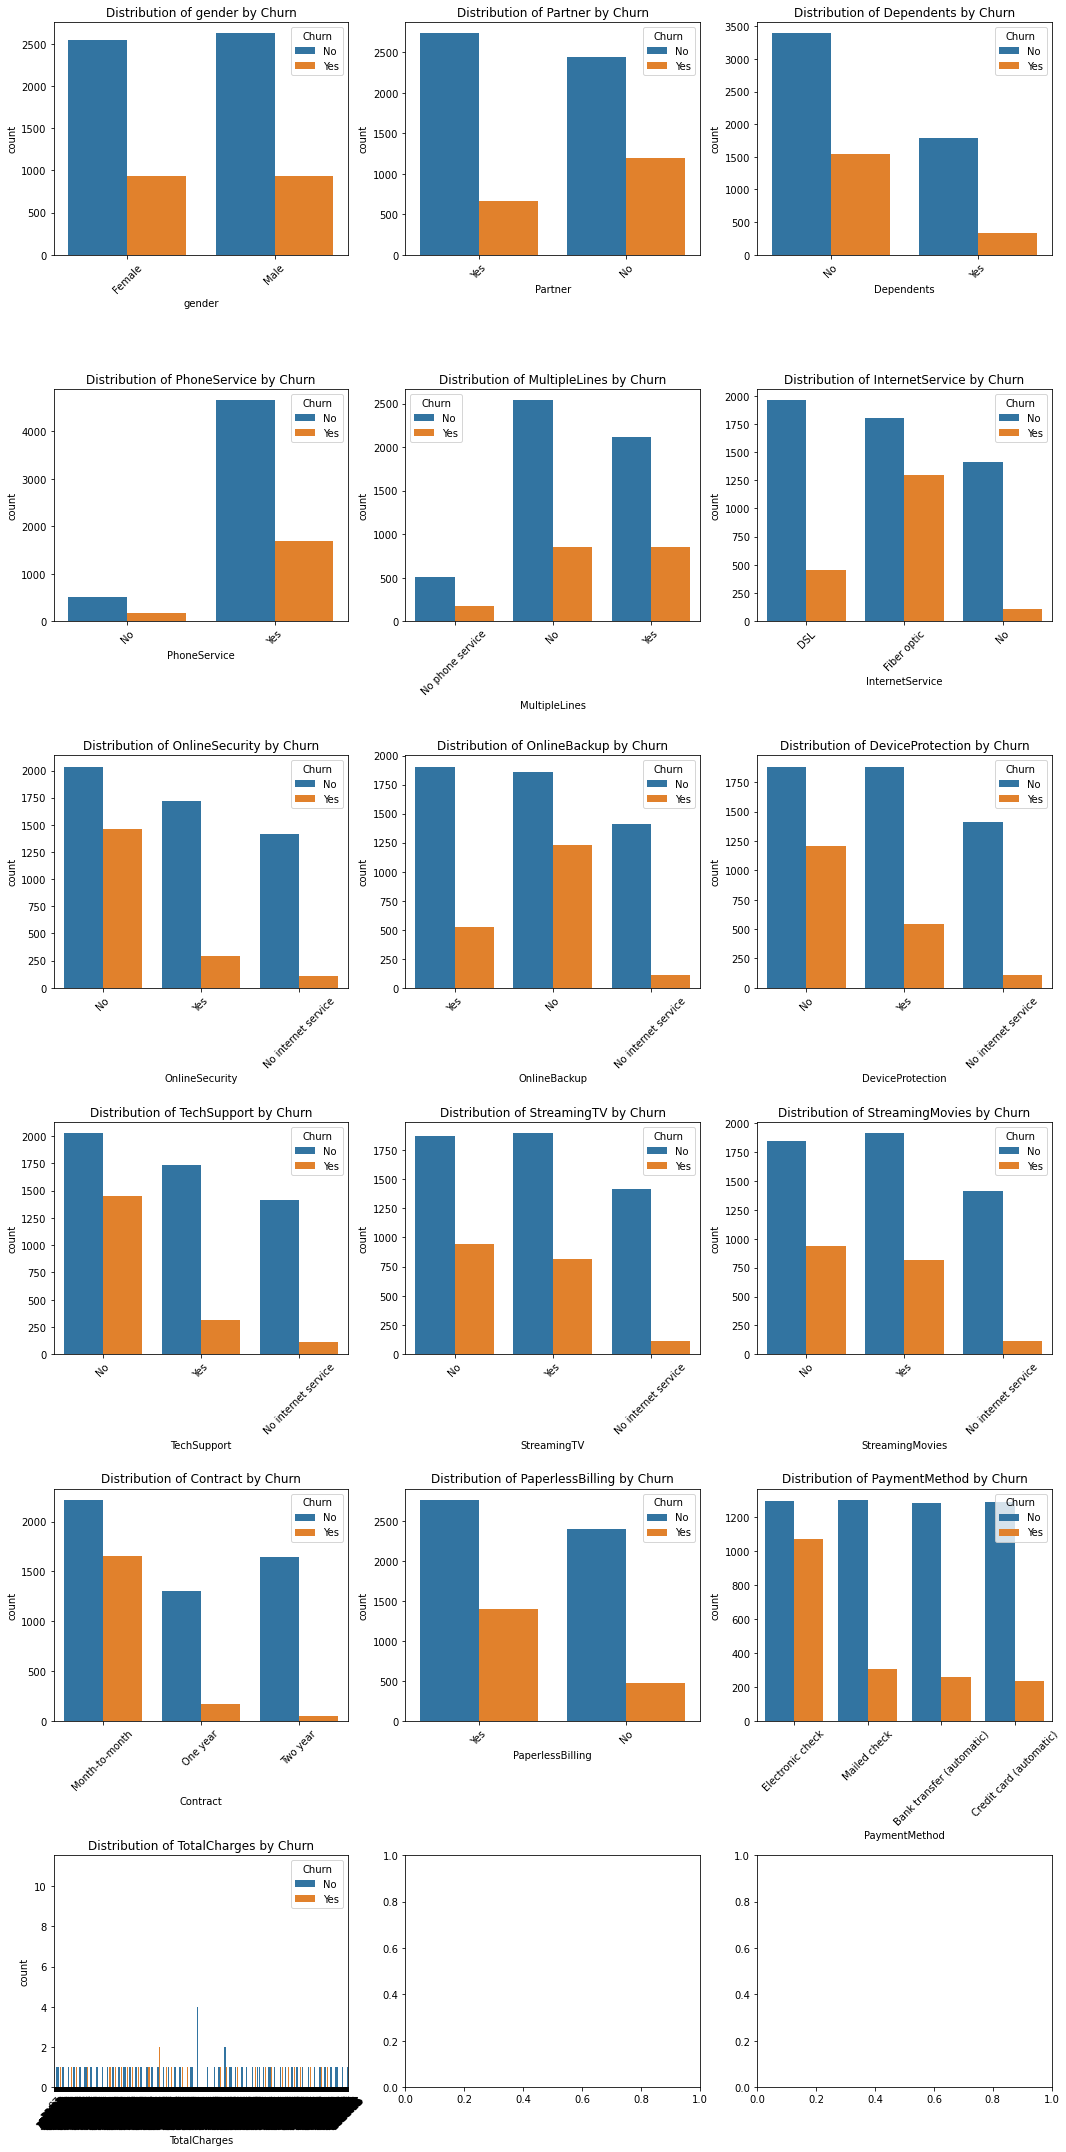

In [52]:
categorical_cols=telecom_df.select_dtypes(include="object").columns.tolist()
categorical_cols.remove('customerID')
categorical_cols.remove('Churn')

n_cols=3
n_rows=(len(categorical_cols)+n_cols-1)//n_cols

fig,axes= plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes=axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=telecom_df,x=col,hue="Churn",ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by Churn')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title='Churn')
plt.tight_layout()
plt.show()

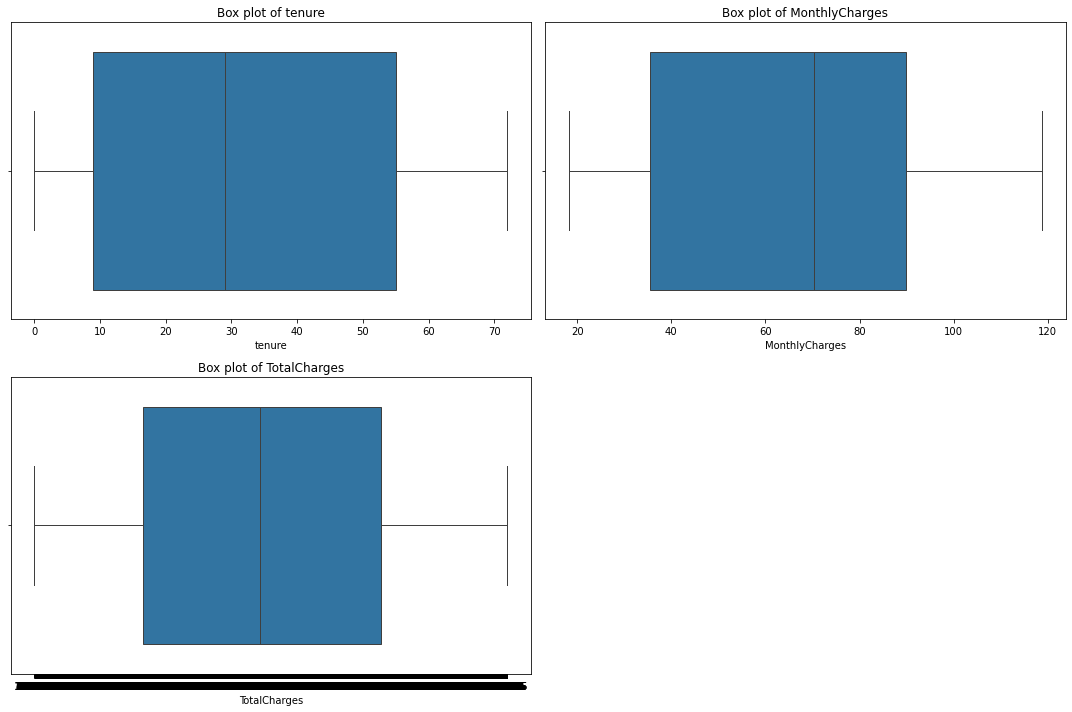

In [55]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(['tenure', 'MonthlyCharges', 'TotalCharges']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=telecom_df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

# Data Preprocessing

### Label Encoding

In [82]:
categorical_columns = categorical_features.to_list()
label_encoder = LabelEncoder()
categorical_features = telecom_df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    telecom_df[col] = label_encoder.fit_transform(telecom_df[col])

### Scaling

In [83]:
features = telecom_df.columns.to_list()[:-1]

In [85]:
scaler = StandardScaler()
telecom_df[features] = scaler.fit_transform(telecom_df[features])

In [86]:
telecom_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.911890,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,...,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-0.398608,0
1,0.216906,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,...,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,-0.948762,0
2,-0.470701,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,...,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-1.641883,1
3,0.990587,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,...,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,-0.983710,0
4,1.470632,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,...,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-1.235224,1


In [88]:
telecom_df.drop(columns=['customerID'],inplace=True)

###  KMeans

In [98]:
kmeans = KMeans(n_clusters=4, random_state=42)
telecom_df['Segment'] = kmeans.fit_predict(telecom_df[['tenure','MonthlyCharges','TotalCharges']])

In [101]:
telecom_df['Segment'] = scaler.fit_transform(telecom_df[['Segment']])

### PCA

In [104]:
pca = PCA(n_components=2)
telecom_df[['PCA1', 'PCA2']] = pca.fit_transform(telecom_df[['tenure','MonthlyCharges','TotalCharges']])

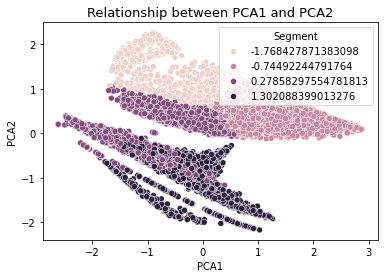

In [106]:
sns.scatterplot(x='PCA1', y='PCA2', hue='Segment', data=telecom_df)
plt.title("Relationship between PCA1 and PCA2", fontsize=13)
plt.show()

### Data Augmentation

* SMOTE

In [117]:

features = telecom_df.columns.to_list()
features = [x for x in features if x != 'Churn']
x = telecom_df[features]
y = telecom_df[['Churn']]

In [119]:
smote = SMOTE(random_state=42)
x_smote,y_smote = smote.fit_resample(x, y)

# Models

* XGBoost
* Random Forest
* Decision Tree

### Split Our Dataset

In [126]:
normalize_telecom_df = x_smote
normalize_telecom_df['Churn'] = y_smote['Churn']

In [131]:
features = normalize_telecom_df.columns.to_list()[:-1]
x_scaled = normalize_telecom_df[features]
y_scaled = normalize_telecom_df['Churn']

In [133]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y_scaled, test_size=0.2, random_state=42, stratify=y_scaled)

### XGBoost

In [137]:
xgb_model = xgb.XGBClassifier(random_state=42,eval_metric='logloss')

In [138]:
param_grid = {
    'max_depth': [3, 6, 10],         
    'learning_rate': [0.01, 0.1, 0.2],  
    'n_estimators': [50, 100, 150],  
    'subsample': [0.8, 0.9, 1.0],    
    'colsample_bytree': [0.8, 0.9, 1.0],  
    'gamma': [0, 0.1, 0.2]      
}

In [139]:
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

In [140]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 729 candidates, totalling 3645 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 6, 10],
                         'n_estimators': [50, 100, 150],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy', verbose=1)

### Check the best parameters and best score

In [141]:
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy score found: ", grid_search.best_score_)

Best parameters found:  {'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'subsample': 1.0}
Best accuracy score found:  0.8586598216501015


In [145]:
xgb_best_model = grid_search.best_estimator_
y_pred = xgb_best_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {test_accuracy:.4f}')
print("ROC-AUC:", roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Test Accuracy: 0.8536
ROC-AUC: 0.8536231884057971
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1035
           1       0.85      0.86      0.86      1035

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070



### Random Forest

In [151]:
rf_model = RandomForestClassifier(random_state=42)

In [153]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

In [154]:
grid_search = GridSearchCV(estimator=rf_model,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=3,
                           verbose=2,
                           n_jobs=-1)

grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=2)

In [155]:
rf_best_model = grid_search.best_estimator_
y_pred = rf_best_model.predict(x_test)

In [157]:
y_pred = rf_best_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {test_accuracy:.4f}')
print("ROC-AUC:", roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Test Accuracy: 0.8614
ROC-AUC: 0.8613526570048309
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1035
           1       0.86      0.86      0.86      1035

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070



In [159]:
dt_model = DecisionTreeClassifier(random_state=42)

In [160]:
param_grid = {
    'criterion': ['gini', 'entropy'],  
    'max_depth': [None, 10, 20, 30, 40],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'max_features': [None, 'sqrt', 'log2'],  
    'splitter': ['best', 'random']  
}

In [161]:
grid_search = GridSearchCV(estimator=dt_model,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,  
                           verbose=2,
                           n_jobs=-1)

In [162]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=2)

In [164]:
dt_best_model = grid_search.best_estimator_
y_pred = dt_best_model.predict(x_test)

In [165]:
y_pred = dt_best_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {test_accuracy:.4f}')
print("ROC-AUC:", roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Test Accuracy: 0.8019
ROC-AUC: 0.8019323671497585
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1035
           1       0.80      0.81      0.80      1035

    accuracy                           0.80      2070
   macro avg       0.80      0.80      0.80      2070
weighted avg       0.80      0.80      0.80      2070

